# California Housing - Data Preprocessing

**DATA 4950 Week 5 Demo**

## What we will Cover
1. Load data
2. Drop rows with missing TARGET ← Do this first!
3. Simple cleaning (duplicates, obvious errors)
4. Train-test split
5. Handle missing values (4 techniques)
6. Handle outliers (3 techniques)
7. Build baseline regression model
8. Save for next notebook

In [1]:
## import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## settings for plots
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns',None)

## 1. Load Data

In [2]:
## load data
df = pd.read_csv('../data/raw/california_housing.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0


In [3]:
# for demonstration: Introduce artificial missing values
# (California Housing has no missing values, so we create some)



## create some missing values for demo
np.random.seed(4950)
df_demo = df.copy()



# Missing in TARGET (2% - these rows MUST be dropped)
target_idx = np.random.choice(df_demo.index, size=int(0.02 * len(df_demo)), replace=False)
df_demo.loc[target_idx, 'median_house_value'] = np.nan

# Missing in FEATURES (5% in HouseAge, 3% in AveBedrms - these can be imputed)
feature1_idx = np.random.choice(df_demo.index, size=int(0.05 * len(df_demo)), replace=False)
df_demo.loc[feature1_idx, 'HouseAge'] = np.nan


### TODO: Have your own missing feature




# NEGATIVE INCOME (impossible! - data entry errors)
negative_income_idx = np.random.choice(df_demo.index, size=18, replace=False)
df_demo.loc[negative_income_idx, 'MedInc'] = -1 * np.abs(np.random.uniform(1, 5, size=18))

df_demo

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,NaN,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,NaN,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,NaN,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0


In [4]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            19608 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20021 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   median_house_value  20228 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## 2. Data Quality Assessment

In [5]:
print("Missing values introduced for demonstration:")
print(df_demo.isnull().sum())
print(f"\n Total rows: {len(df_demo)}")

Missing values introduced for demonstration:
MedInc                   0
HouseAge              1032
AveRooms                 0
AveBedrms              619
Population               0
AveOccup                 0
Latitude                 0
Longitude                0
median_house_value     412
dtype: int64

 Total rows: 20640


In [6]:
## check impossible values
positive_col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
                    'Population', 'AveOccup', 'median_house_value']
for col in positive_col:
    ## TODO: check if negative values
    

    if neg_count:
        print(f'{col}: has negative values')
        print(f'Samples: ')
        print(f'{df_demo[df_demo[col]<0].head(3)}')

MedInc: has negative values
Samples: 
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
1632 -3.578038      38.0  6.890710   0.967213       472.0  2.579235     37.87   
1813 -4.450545      39.0  4.332845   1.020528      1417.0  2.077713     37.91   
4545 -3.429432      48.0  3.729097   0.991639      2419.0  4.045151     34.02   

      Longitude  median_house_value  
1632    -122.17            438000.0  
1813    -122.31            167800.0  
4545    -118.20            130700.0  


## 3. Data Preprocessing

### step 1. Handle Missing TARGET Values (Before Split!)

**CRITICAL: Target Missing Values Must Be DROPPED**

**Why can't we impute missing target values?**

- The target is what we're trying to predict
- Imputing = making up answers = training on fabricated data
- This will NOT generalize to real-world predictions

In [7]:
target_col = 'median_house_value'
missing_target = df_demo[target_col].isnull().sum()


print(f"\n Mising values in target '{target_col}' : {missing_target}")
print(f"Percentage:  {missing_target/len(df_demo)*100:.2f}%")


 Mising values in target 'median_house_value' : 412
Percentage:  2.00%


In [8]:
# TODO:DROP rows with missing target (NO OTHER OPTION!)



In [9]:
# verify no missing targets remain
df_clean[target_col].isnull().sum()

0

In [10]:
## but there MAY remain missing values in df_clean in FEATURES
df_clean.isnull().sum()

MedInc                   0
HouseAge              1006
AveRooms                 0
AveBedrms              605
Population               0
AveOccup                 0
Latitude                 0
Longitude                0
median_house_value       0
dtype: int64

### Step 2: Simple Cleaning (Before Split - OK)

These operations are safe before splitting because they don't use statistics:
- Removing duplicate rows
- Fixing obvious data entry errors (e.g., age = 999)
- Removing impossible values (e.g., negative prices)

In [11]:
## remove duplicates



Duplicate rows found: 0


No duplicates to remove


In [13]:
## check impossible values
positive_col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
                    'Population', 'AveOccup', 'median_house_value']
for col in positive_col:
    neg_count = (df_clean[col]<0).sum()
    if neg_count:
        print(f'{col}: has negative values')

        ## remove negative values
        df_clean = df_clean[df_clean[col]>=0]
        
        print(f'reomved {neg_count} rows with negative {col}')

MedInc: has negative values
reomved 18 rows with negative MedInc


In [14]:
# Verify no more impossible values






No impossible values remaining


In [15]:
print(f"\nDataset shape originally: {df_demo.shape}")
print(f"\nDataset shape after all pre-split cleaning: {df_clean.shape}")


Dataset shape originally: (20640, 9)

Dataset shape after all pre-split cleaning: (20210, 9)


### Step 3. Train-Test Split

**Now we split.** After this point, all operations using statistics must:
1. Be **fit on training data only**
2. Be **applied to both** train and test sets

In [16]:
## seperate features and target



In [17]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,NaN,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,NaN,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,NaN,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [18]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20210, dtype: float64

In [19]:
print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


Features (X) shape: (20210, 8)
Target (y) shape: (20210,)


In [20]:
## split first!





In [21]:
print(f'Training:{X_train.shape[0]:,} samples')
print(f'Ttest:{X_test.shape[0]:,} samples')

Training:16,168 samples
Ttest:4,042 samples


In [22]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9031,8.4331,36.0,6.266871,1.432515,606.0,1.858896,34.02,-118.60
19048,3.2672,32.0,5.204380,1.070560,1154.0,2.807786,38.45,-121.83
2860,3.0938,6.0,4.979679,1.038503,2320.0,2.481283,35.41,-118.90
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20355,1.9811,16.0,6.104730,1.168919,587.0,1.983108,34.19,-118.96
...,...,...,...,...,...,...,...,...
11524,5.2589,17.0,4.618227,1.162562,900.0,2.216749,33.72,-118.05
3714,3.0395,35.0,3.797909,1.043554,1483.0,2.583624,34.19,-118.40
7463,3.4712,40.0,4.798561,0.992806,1226.0,4.410072,33.93,-118.19
12151,4.5881,3.0,6.037244,0.965549,3295.0,3.067970,33.69,-117.19


In [23]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16822,4.0556,20.0,4.405769,1.080769,2325.0,2.235577,37.65,-122.53
8069,3.3125,39.0,5.589506,1.149691,1330.0,2.052469,33.83,-118.18
20081,3.8203,11.0,6.113695,1.028424,1046.0,2.702842,38.02,-120.31
6081,3.7750,25.0,5.207547,1.125000,1084.0,2.556604,34.10,-117.87
3884,4.3261,NaN,5.606557,0.992974,1490.0,3.489461,34.21,-118.52
...,...,...,...,...,...,...,...,...
9360,3.5838,22.0,3.943856,1.048199,2980.0,1.578390,37.95,-122.53
12062,5.0464,17.0,6.013015,0.973970,1685.0,3.655098,33.87,-117.58
985,5.6417,13.0,6.760000,1.063590,4847.0,2.485641,37.66,-121.84
18749,2.6488,21.0,5.837379,1.155340,1197.0,2.905340,40.50,-122.28


### Step 4. Handle Missing FEATURE Values

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16168 entries, 9031 to 6111
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      16168 non-null  float64
 1   HouseAge    15368 non-null  float64
 2   AveRooms    16168 non-null  float64
 3   AveBedrms   15695 non-null  float64
 4   Population  16168 non-null  float64
 5   AveOccup    16168 non-null  float64
 6   Latitude    16168 non-null  float64
 7   Longitude   16168 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [25]:
X_train.isnull().sum()

MedInc          0
HouseAge      800
AveRooms        0
AveBedrms     473
Population      0
AveOccup        0
Latitude        0
Longitude       0
dtype: int64

In [26]:
print(f'Mising %: {X_train.isnull().sum()/len(X_train)*100}')

Mising %: MedInc        0.000000
HouseAge      4.948046
AveRooms      0.000000
AveBedrms     2.925532
Population    0.000000
AveOccup      0.000000
Latitude      0.000000
Longitude     0.000000
dtype: float64


In [27]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4042 entries, 16822 to 4178
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      4042 non-null   float64
 1   HouseAge    3838 non-null   float64
 2   AveRooms    4042 non-null   float64
 3   AveBedrms   3911 non-null   float64
 4   Population  4042 non-null   float64
 5   AveOccup    4042 non-null   float64
 6   Latitude    4042 non-null   float64
 7   Longitude   4042 non-null   float64
dtypes: float64(8)
memory usage: 284.2 KB


In [28]:
X_test.isnull().sum()

MedInc          0
HouseAge      204
AveRooms        0
AveBedrms     131
Population      0
AveOccup        0
Latitude        0
Longitude       0
dtype: int64

#### Method 1: Drop rows with missing values (Simple but loses data)

In [29]:
## drop ALL rows with any missing value
X_train_dropped = X_train.dropna()
print(f'X_train Original rows: {len(X_train)}')
print(f'        After dropping: {len(X_train_dropped)}')
print(f'        Rows lost: {len(X_train) - len(X_train_dropped)}')

X_train Original rows: 16168
        After dropping: 14921
        Rows lost: 1247


In [30]:
X_test_dropped = X_test.dropna()
print(f'X_test Original rows: {len(X_test)}')
print(f'       After dropping: {len(X_test_dropped)}')
print(f'       Rows lost: {len(X_test) - len(X_test_dropped)}')

X_test Original rows: 4042
       After dropping: 3713
       Rows lost: 329


In [31]:
## drop rows only if a specific column is missing
X_train_dropped_specific = X_train.dropna(subset=['HouseAge'])
print(f'X_train After dropping missing HouseAge: {len(X_train_dropped_specific)}')

X_train After dropping missing HouseAge: 15368


In [32]:
X_train_dropped_all = X_train_dropped_specific.dropna(subset=['AveBedrms'])
print(f'X_train After dropping missing HouseAge & AveBedrms: {len(X_train_dropped_all)}')

X_train After dropping missing HouseAge & AveBedrms: 14921


#### Method 2: Fill with a constant value

In [33]:
## fill missing values with 0


X_train missing values after filling with 0:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [34]:
## fill missing values in a specific column with 0




X_train missing values after filling missing values in AveBedrms with 0:
MedInc          0
HouseAge      800
AveRooms        0
AveBedrms       0
Population      0
AveOccup        0
Latitude        0
Longitude       0
dtype: int64


#### Method 3: Mean Imputation (most common for numeric data)

Replace missing values with **training mean** to avoid data leakage. Simple but sensitive to outliers.

In [35]:
# calculate the mean of non-missing values
mean_HouseAge = X_train['HouseAge'].mean()
print(f'Mean of HouseAge: {mean_HouseAge:.2f}')

Mean of HouseAge: 28.69


In [36]:
## fill missing values with training mean
X_train_fillmean = X_train.copy()
X_train_fillmean['HouseAge'] = X_train_fillmean['HouseAge'].fillna(mean_HouseAge)
print(f"X_train missing values in HouseAge after filling: {X_train_fillmean['HouseAge'].isnull().sum()}")

X_test_fillmean = X_test.copy()
X_test_fillmean['HouseAge'] = X_test_fillmean['HouseAge'].fillna(mean_HouseAge)
print(f"X_test missing values in HouseAge after filling: {X_test_fillmean['HouseAge'].isnull().sum()}")

X_train missing values in HouseAge after filling: 0
X_test missing values in HouseAge after filling: 0


#### Method 4: Fill with median (better for skewed data)

Median of HouseAge: 29.00


X_train missing values in HouseAge after filling: 0


In [41]:
print(f'Missing values remaining: {X_train_fillmedian.isnull().sum()}')
print(f'Missing values remaining: {X_test_fillmedian.isnull().sum()}')

Missing values remaining: MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
Missing values remaining: MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


### Step 5. Handle Outliers

In [42]:
## we will use median for this demo (robust to outliers)
X_train_clean = X_train_fillmedian.copy()
X_test_clean = X_test_fillmedian.copy()

print('Using median imputation for this project')
print(f'Missing values remaining: {X_train_clean.isnull().sum().sum()}')
print(f'Missing values remaining: {X_test_clean.isnull().sum().sum()}')

Using median imputation for this project
Missing values remaining: 0
Missing values remaining: 0


#### Method 1: Remove outliers using IQR

In [43]:
column = 'AveBedrms'



In [44]:
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

Q1: 1.01
Q3: 1.11
IQR: 0.10
Lower bound: 0.86
Upper bound: 1.26


In [45]:
outliers = X_train_clean[(X_train_clean[column]<lower_bound)|(X_train_clean[column]>upper_bound)]
print(f"Number of outliers in {column}: {len(outliers)}")
print(f"Max value: {X_train_clean[column].max():.2f}")

Number of outliers in AveBedrms: 1472
Max value: 29.00


#### Method 2: Cap outliers (Winsorization)

In [46]:
# cap outliers at  bound




print(f"X_train before capping - Max: {X_train_clean['AveBedrms'].max():.2f}")
print(f"X_train after capping - Max: {X_train_clean['AveBedrms_capped'].max():.2f}")

X_train before capping - Max: 29.00
X_train after capping - Max: 1.26


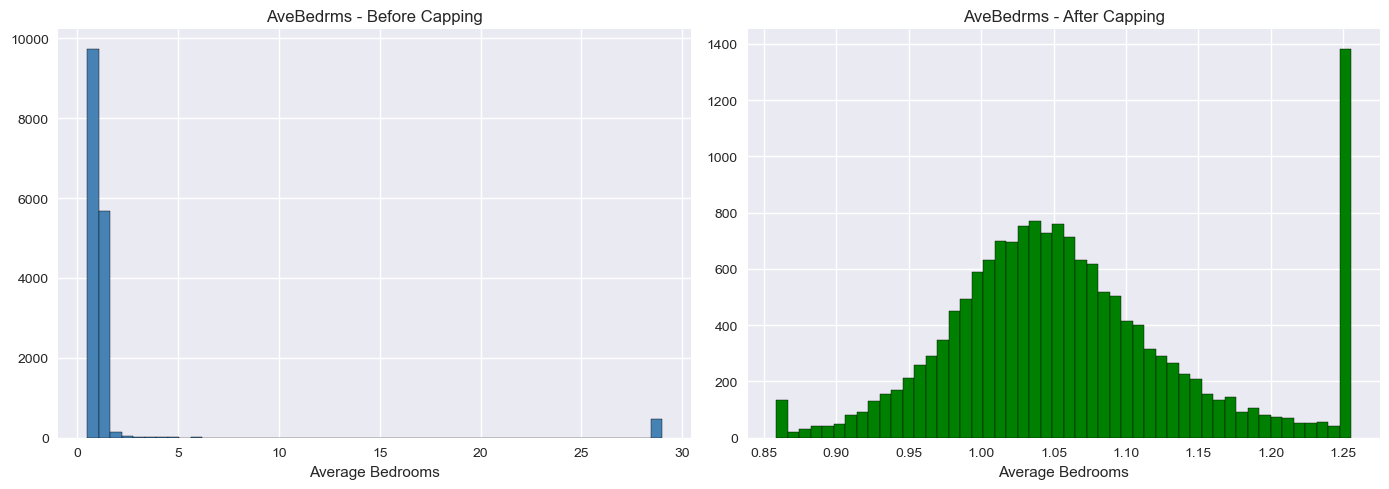

In [47]:
# Compare distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(X_train_clean['AveBedrms'], bins=50, color='steelblue', edgecolor='black')
axes[0].set_title('AveBedrms - Before Capping')
axes[0].set_xlabel('Average Bedrooms')

axes[1].hist(X_train_clean['AveBedrms_capped'], bins=50, color='green', edgecolor='black')
axes[1].set_title('AveBedrms - After Capping')
axes[1].set_xlabel('Average Bedrooms')

plt.tight_layout()
plt.show()

In [48]:
# Columns to cap
columns_to_cap = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']







## 4. Data Validation

In [49]:
print("=" * 50)
print("STEP 7: Final Validation")
print("=" * 50)

# Check for missing values
print("\n1. Missing Values:")
print(f"   X_train: {X_train_final.isnull().sum().sum()} missing")
print(f"   X_test:  {X_test_final.isnull().sum().sum()} missing")
print(f"   y_train: {y_train.isnull().sum()} missing")
print(f"   y_test:  {y_test.isnull().sum()} missing")

# Check for infinite values
print("\n2. Infinite Values:")
print(f"   X_train: {np.isinf(X_train_final).sum().sum()} infinite")
print(f"   X_test:  {np.isinf(X_test_final).sum().sum()} infinite")

# Final shapes
print("\n3. Final Shapes:")
print(f"   X_train: {X_train_final.shape}")
print(f"   X_test:  {X_test_final.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   y_test:  {y_test.shape}")

print("\n All validation checks passed!")

STEP 7: Final Validation

1. Missing Values:
   X_train: 0 missing
   X_test:  0 missing
   y_train: 0 missing
   y_test:  0 missing

2. Infinite Values:
   X_train: 0 infinite
   X_test:  0 infinite

3. Final Shapes:
   X_train: (16168, 8)
   X_test:  (4042, 8)
   y_train: (16168,)
   y_test:  (4042,)

 All validation checks passed!


In [50]:
import os
import pickle

# Create directory
os.makedirs('../data/processed', exist_ok=True)

# Save processed data
X_train_final.to_csv('../data/processed/X_train.csv', index=False)
X_test_final.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)


### Key Decisions Summary

| Issue | Action | When | Why |
|-------|--------|------|-----|
| Missing TARGET | DROP | Before split | Can't impute what we're predicting |
| Impossible values | DROP | Before split | Impossible - domain knowledge |
| Duplicates | DROP | Before split | No statistics needed |
| Missing FEATURES | IMPUTE | After split | Fit on train only |
| Statistical outliers | CAP | After split | Bounds from train only |


## 5. Build Baseline Model

We build a simple model now, BEFORE feature engineering. This gives us a baseline to compare against later.

In [51]:
## train baseline model



In [52]:
## predict
y_train_pred = baseline_model.predict(X_train_final)
y_test_pred = baseline_model.predict(X_test_final)

## evaluate
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [53]:
print('Baseline Model Performance (NO feature engineering)')
print('=' * 50)
print(f'{"Metric":<10} {"Train":>12} {"Test":>12}')
print('-' * 50)
print(f'{"R²":<10} {train_r2:>12.4f} {test_r2:>12.4f}')
print(f'{"RMSE":<10} {train_rmse:>12.4f} {test_rmse:>12.4f}')

Baseline Model Performance (NO feature engineering)
Metric            Train         Test
--------------------------------------------------
R²               0.6635       0.6596
RMSE         67051.3416   66868.1165


In [54]:
## save baseline performance for comparison
baseline_r2 = test_r2
baseline_rmse = test_rmse

print(f'\nBaseline to beat: R² = {baseline_r2:.4f}')


Baseline to beat: R² = 0.6596
